In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

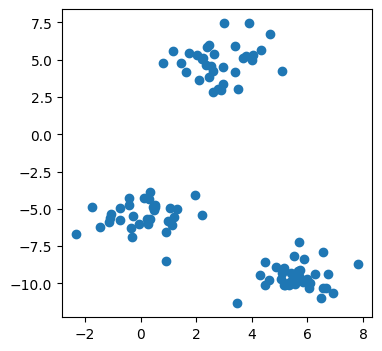

In [5]:
X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=3, random_state=10, shuffle=True, cluster_std=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

fig, ax = plt.subplots(figsize=(4, 4))
#ax[0].scatter(X[:, 0], y)
#ax[1].scatter(X[:, 1], y)
ax.scatter(X[:, 0], X[:, 1])
plt.show()


Accuracy: 40.0%


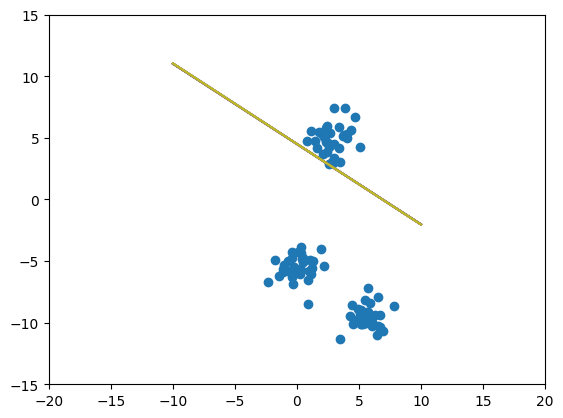

In [21]:
class MultiClassPerceptron(object):
    def __init__(self):
        pass
    
    def activation_function(self, preds):
        return np.argmax(preds)
    
    def fit(self, X, y, epochs, nrn=25, lr=0.1):
        n, m = X.shape
        n_classes = len(np.unique(y))
        h = np.random.uniform(0, 1, n_classes)
        bias = np.random.uniform(0, 1, n_classes)
        error = np.random.uniform(0, 1, n_classes)
        update = np.random.uniform(0, 1, n_classes)
        weights = np.random.uniform(0, 1, (n_classes, m))
        n_weights = np.random.uniform(0, 1, (nrn, n_classes, m))
        neurons = np.ones(nrn)
        for e in range(epochs):
            for i in range(len(X)):
                for j in range(nrn):
                    for c in range(n_classes):
                        h[c] = np.dot(X[i], n_weights[j][c]) + bias[c]
                        error[c] = (y[i] - neurons[j])
                        update[c] =  lr * error[c]
                        n_weights[j][c] = n_weights[j][c] + update[c] * X[i]
                        bias[c] = bias[c] + update[c]
                    neurons[j] = self.activation_function(h)
    
        for n in range(len(n_weights)-1):
            for c in range(n_classes):
                weights[c] = np.add(n_weights[n+1][c], n_weights[n+1][c])
        for c in range(n_classes):
            weights[c] = weights[c]/len(n_weights)

        return weights, np.unique(neurons, return_counts=True)[0].argmax(), bias
    
    def predict(self, X, weights, bias):
        h = np.ones((X.shape[0], weights.shape[0]))
        self.y_preds = np.ones(X.shape[0])
        for i in range(len(X)):
            h[i] = np.dot(weights, X[i])+bias
            self.y_preds[i] = self.activation_function(h[i])
         
    def accuracy(self, y_test):
        return (np.sum(self.y_preds == y_test)/len(self.y_preds))*100
           
    def get_boundary(self, bias, weights, x):
        m = - weights[0] / weights[1]
        b = - bias / weights[1]
        return m * x + b 
        
model = MultiClassPerceptron()
weights, y_pred, bias = model.fit(X_train, y_train, epochs=100, nrn=5, lr=0.1)
model.predict(X_test, weights, bias)
accuracy = model.accuracy(y_test)
print("Accuracy: {0}%".format(accuracy))
fig, ax = plt.subplots(1)
ax.scatter(X[:, 0], X[:, 1])

x = np.linspace(-10, 10, 1000)
y1 = np.array([model.get_boundary(bias, weights[0], i) for i in x])
y2 = np.array([model.get_boundary(bias, weights[1], i) for i in x])
y3 = np.array([model.get_boundary(bias, weights[2], i) for i in x])
plt.xlim([-20, 20])
plt.ylim([-15, 15])
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.show()